In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from os.path import join, exists

In [2]:
sns.set(style='whitegrid', context='talk')
plt.rcParams["font.family"] = "monospace"
plt.rcParams['font.monospace'] = 'Courier New'

PROJ_DIR = "/Volumes/projects_herting/LABDOCS/Personnel/Katie/deltaABCD_clustering/"
DATA_DIR = "data/"
FIGS_DIR = "figures/"
OUTP_DIR = "output/"

In [3]:
atlases = ['desikankillany', 
           'destrieux+gordon']

In [19]:
atlas = atlases[0]
results = pd.read_csv(join(PROJ_DIR, 
                    OUTP_DIR, 
                    f'bgmm_{atlas}_cv-results.csv'), 
                      index_col=0, 
                      header=0)
best_params = pd.read_csv(join(PROJ_DIR,
                        OUTP_DIR,
                        f'bgmm_{atlas}_best-model.csv'), 
                          index_col=0, 
                          header=0)

In [38]:
long_results = results.melt(value_vars=['split1_train_score', 'split2_train_score',
                         'split3_train_score', 'split4_train_score', 
                         'split5_train_score', 'split6_train_score', 
                         'split7_train_score', 'split8_train_score', 
                         'split9_train_score', 'split0_train_score'], 
             id_vars=['param_weight_concentration_prior_type', 
                      'param_n_components', 
                      'param_weight_concentration_prior'])

In [39]:
long_results

,param_weight_concentration_prior_type,param_n_components,param_weight_concentration_prior,variable,value
0,dirichlet_process,2,0.1,split1_train_score,4976.063203
1,dirichlet_distribution,2,0.1,split1_train_score,4972.493439
2,dirichlet_process,2,1.0,split1_train_score,4748.833843
3,dirichlet_distribution,2,1.0,split1_train_score,4956.176259
4,dirichlet_process,2,10.0,split1_train_score,4972.295080
...,...,...,...,...,...
1885,dirichlet_process,2,100000.0,split0_train_score,-1663.917567
1886,dirichlet_distribution,2,100.0,split0_train_score,-2334.750166
1887,dirichlet_process,8,1.0,split0_train_score,-742.673144
1888,dirichlet_process,2,100000.0,split0_train_score,-2370.244463


<AxesSubplot:xlabel='param_n_components', ylabel='value'>

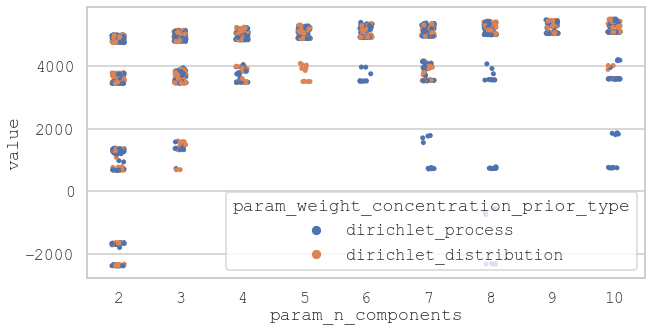

In [42]:
fig,ax = plt.subplots(figsize=(10,5))
#sns.stripplot(x='n_components', 
#                y='test_score', 
#                data=best_params.T, 
#                ax=ax
#               )
sns.stripplot(x='param_n_components', 
              y='value', 
              data=long_results, 
              hue='param_weight_concentration_prior_type',
              ax=ax)


In [18]:
ax.get_ylim()

(-9.4, 197.4)

In [ ]:
for atlas in atlases:
    results = pd.read_csv(join(PROJ_DIR, 
                        OUTP_DIR, 
                        f'bgmm_{atlas}_cv-results.csv'), index_col=0, header=0)
    best_params = pd.read_csv(join(PROJ_DIR,
                            OUTP_DIR,
                            f'bgmm_{atlas}_best-model.csv'), index_col=0, header=0)